In [1]:
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

#for the statistical tests
import scipy.stats as stats  
import statsmodels.api as sm

#for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

C:\Users\ACER PC\AppData\Local\Temp\ipykernel_11952\4205447661.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Importing datasets

In [2]:
claims = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Case Study 3 - Insurance Claims Case Study/claims.csv')
cust = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [3]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [4]:
cust.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [5]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [6]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


### merging the two datasets to get a 360-degree view of the data

In [7]:
cust_claims = pd.merge(how = 'outer', left = claims , right = cust, left_on = 'customer_id', right_on = 'CUST_ID')

In [8]:
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver


In [9]:
#Dropping the column 'CUST_ID'
cust_claims.drop('CUST_ID', axis=1, inplace= True)

### Data Audit

In [10]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   float64
 1   customer_id          1100 non-null   float64
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1092 non-null   object 
 11  DateOfBirth          1092 non-null   object 
 12  State                1092 non-null   object 
 13  Contact              1092 non-null   object 
 14  Segment              1092 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [11]:
#1) 'claim_amount' needs to be changed to numeric datatype
#2) 'claim_date' and 'DateOfBirth' needs to be changed to date type
#3)  We can exclude the 'Contact' variable since it does not have much significance from the business point of view.
#4) We can change the datatype of claim_id, customer_id, total_policy_claims from float to int

In [12]:
#Changing the datatype of the variable - 'claim_date' and 'DateOfBirth' to datetime
cust_claims['claim_date'] = pd.to_datetime(cust_claims.claim_date)
cust_claims['DateOfBirth'] = pd.to_datetime(cust_claims.DateOfBirth)

In [13]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver


### Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [14]:
cust_claims['claim_amount'] = cust_claims.claim_amount.str.replace('$', '').astype('float')

C:\Users\ACER PC\AppData\Local\Temp\ipykernel_11952\2258924850.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims['claim_amount'] = cust_claims.claim_amount.str.replace('$', '').astype('float')


In [15]:
cust_claims.claim_amount.dtype

dtype('float64')

In [16]:
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver


In [17]:
Data_Audit = ProfileReport(cust_claims)
Data_Audit

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### UDF

In [18]:
# Create Data audit Report for continuous variables

def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [19]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [20]:
#Separating the Continuous and Categorical variables
cont_var = cust_claims.select_dtypes(include=['int', 'float'])
cat_var = cust_claims.select_dtypes(include=['object'])

In [21]:
#EDA for all the continuous variables
cont_var.apply(lambda x: continuous_var_summary(x))

,claim_id,customer_id,claim_amount,total_policy_claims
dtype,float64,float64,float64,float64
cardinality,1100,1093,683,8
n_tot,1107,1107,1107,1107
n,1100,1100,1035,1090
nmiss,7,7,72,17
perc_miss,0.63234,0.63234,6.504065,1.535682
sum,53722009058.0,55879498414.0,12877599.5,1735.0
mean,48838190.052727,50799544.012727,12442.125121,1.591743
std,29188059.567557,28477268.13232,13766.391982,1.147251
var,851942821319257.75,810954800280058.0,189513548.202657,1.316185


In [22]:
#EDA for all the categorical variables
cat_var.apply(lambda x: categorical_var_summary(x))

,incident_cause,claim_area,police_report,claim_type,fraudulent,gender,State,Contact,Segment
N,1100,1100,1100,1100,1100,1092,1092,1092,1092
NMISS,7,7,7,7,7,15,15,15,15
MODE,Other causes,Auto,No,Material only,No,Male,NY,914-342-8239,Gold
FREQ,290,985,630,663,846,558,31,2,376
PERCENT,26.36,89.55,57.27,60.27,76.91,51.1,2.84,0.18,34.43


### Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [23]:
cust_claims['Unreported_Claims'] = np.where(cust_claims.police_report == 'Unknown', 1, 0)

In [24]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Unreported_Claims
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,1
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0


### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [25]:
#Assuming most recent means in terms of sequence of observation (and not in terms of date). 
#Deleting the duplicate observations accordingly.
cust_claims.drop_duplicates(subset = 'customer_id', keep = 'first', inplace= True)

In [26]:
cust_claims.tail()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Unreported_Claims
1096,10247193.0,14818669.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaT,NaN,NaN,NaN,0
1097,79807493.0,85322831.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaT,NaN,NaN,NaN,0
1098,69299345.0,73449366.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaT,NaN,NaN,NaN,1
1099,58809728.0,43020876.0,Other driver error,2017-06-04,Auto,Yes,Material and injury,36685.0,3.0,Yes,NaN,NaT,NaN,NaN,NaN,0
1100,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,1985-03-15,FL,596-319-8236,Gold,0


### Checking for missing values and imputing the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [27]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.mode())
    return x

In [28]:
cust_claims = cust_claims.apply(lambda x: missing_imputation(x))

### Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria:

### Children < 18, Youth 18-30, Adult 30-60, Senior > 60

In [29]:
#Offsetting the DateOfBirth where birth year is greater than 2020:
cust_claims.loc[cust_claims.DateOfBirth.dt.year>2020, 'DateOfBirth'] = cust_claims[cust_claims.DateOfBirth.dt.year>2020].DateOfBirth.apply(lambda x: x - pd.DateOffset(years = 100))

In [30]:
#Finding the Age of customers:
cust_claims['Age'] = pd.Timestamp.today().year - cust_claims.DateOfBirth.dt.year

In [31]:
#Categorizing the Age on the basis of the conditions asked:
cust_claims.loc[(cust_claims.Age < 18),'AgeGroup'] = 'Children'
cust_claims.loc[(cust_claims.Age >= 18) & (cust_claims.Age <30),'AgeGroup'] = 'Youth'
cust_claims.loc[(cust_claims.Age >= 30) & (cust_claims.Age <60),'AgeGroup'] = 'Adult'
cust_claims.loc[(cust_claims.Age > 60),'AgeGroup'] = 'Senior'

In [32]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Unreported_Claims,Age,AgeGroup
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,44.0,Adult
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,1,53.0,Adult
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,39.0,Adult
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,37.0,Adult
6,22890252.0,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,46.0,Adult


### What is the average amount claimed by the customers from various segments

In [33]:
avg_claimed_amt_by_segment = round(cust_claims.groupby('Segment').claim_amount.mean(),2)
avg_claimed_amt_by_segment

Segment
Gold        12754.12
Platinum    12368.23
Silver      12267.35
Name: claim_amount, dtype: float64

### What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [34]:
round(cust_claims.groupby('incident_cause').claim_amount.sum(),2)

incident_cause
Crime                  764275.64
Driver error          3545805.63
Natural causes        1389928.27
Other causes          4277399.54
Other driver error    3624677.68
Name: claim_amount, dtype: float64

In [35]:
round(cust_claims.loc[cust_claims.claim_date < '2018-10-10', :].groupby('incident_cause').claim_amount.sum(),2)

incident_cause
Crime                  743585.64
Driver error          3433056.18
Natural causes        1368448.54
Other causes          4132462.04
Other driver error    3534113.95
Name: claim_amount, dtype: float64

### How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [36]:
#Filtering the data based on the condition asked and saving it in a variable
x = cust_claims.loc[ (cust_claims.AgeGroup == 'Adult') & 
                ((cust_claims.incident_cause == 'Driver error') | (cust_claims.incident_cause == 'Other driver error')) & 
                ((cust_claims.State == 'TX') | (cust_claims.State == 'DE') | (cust_claims.State == 'AK')) ]

In [37]:
#Grouping the data basd on 'State' to find out the count of insurance claimed for driver related issues
x.groupby('State').customer_id.count()

State
AK    9
DE    9
TX    9
Name: customer_id, dtype: int64

### Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [38]:
summ = round(cust_claims.pivot_table( index = 'Segment', columns = 'gender', 
                   values = 'claim_amount', aggfunc = 'sum'),2)

In [39]:
summ

gender,Female,Male
Segment,,
Gold,2121976.27,2622555.45
Platinum,2369323.09,2095609.32
Silver,1898223.45,2346279.41


array([<AxesSubplot: ylabel='Female'>, <AxesSubplot: ylabel='Male'>],
      dtype=object)

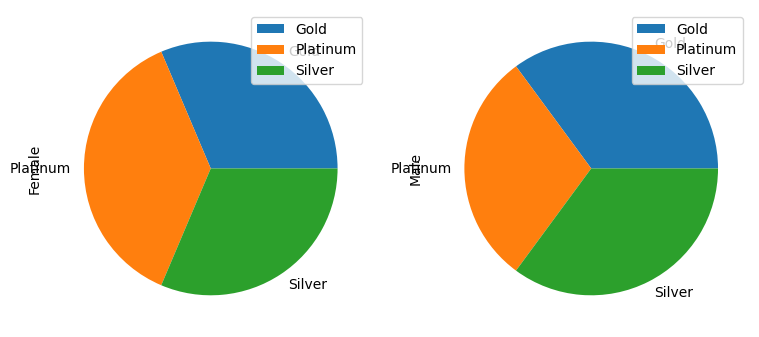

In [40]:
summ.div( summ.sum( axis = 1 ), axis = 0 ).plot( kind = 'pie', stacked = True, subplots = True, figsize = (9,6) )

### Among males and females, which gender had claimed the most for any type of driver related issues?

In [41]:
#filtering data containing driver related issues only
claims_driver_related = cust_claims.loc[(cust_claims.incident_cause == 'Driver error') | (cust_claims.incident_cause == 'Other driver error')]

In [42]:
#Count of claims by Gender
claim_by_gender = round(claims_driver_related.groupby('gender').claim_amount.count(),2)
claim_by_gender

gender
Female    221
Male      280
Name: claim_amount, dtype: int64

In [43]:
#most number of claims by gender
highest_claims = claim_by_gender.sort_values(ascending = False).reset_index().loc[0]
highest_claims

gender          Male
claim_amount     280
Name: 0, dtype: object

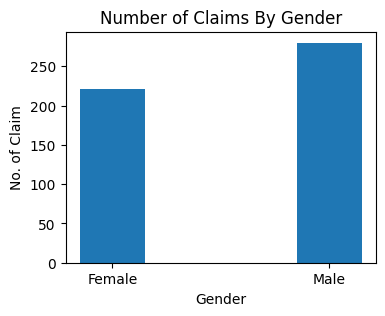

In [44]:
#Bar Chart Visulaization for claim_count comparison by Gender
plt.figure( figsize = (4, 3) )
plt.title('Number of Claims By Gender')
plt.ylabel('No. of Claim')
plt.xlabel('Gender')
plt.bar( x = claim_by_gender.index, height = claim_by_gender.values, width=0.3 )
plt.show()

### Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [45]:
#filtering data containing fraudulent claims only
fraud_claims = cust_claims.loc[cust_claims.fraudulent == 'Yes']

In [46]:
#Count of fraud claims by AgeGroup
fraud_claims_agegroup = fraud_claims.groupby('AgeGroup').fraudulent.count()

In [47]:
#most number of fraud claims by a AgeGroup
highest_fraud_claims = fraud_claims_agegroup.sort_values(ascending = False).reset_index().loc[0]
highest_fraud_claims

AgeGroup      Adult
fraudulent      190
Name: 0, dtype: object

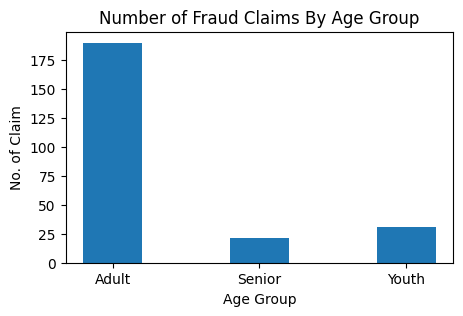

In [48]:
#Bar Chart Visulaization of fraud claim comparison by Age Group
plt.figure( figsize = (5, 3) )
plt.title('Number of Fraud Claims By Age Group')
plt.ylabel('No. of Claim')
plt.xlabel('Age Group')
plt.bar( x = fraud_claims_agegroup.index, height = fraud_claims_agegroup.values, width=0.4 )
plt.show()

### Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

<AxesSubplot: xlabel='claim_date', ylabel='claim_amount'>

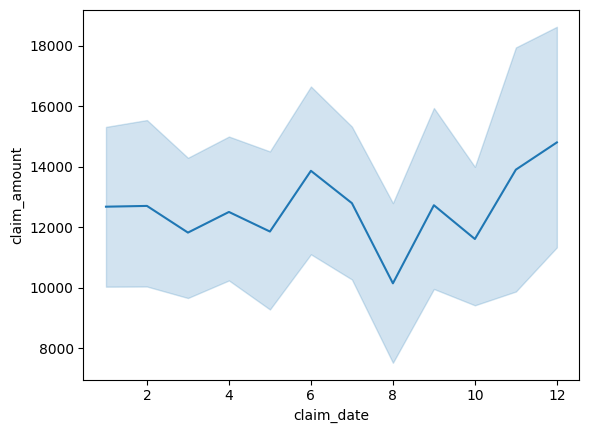

In [49]:
sns.lineplot(x = cust_claims.claim_date.dt.month, y = "claim_amount", data = cust_claims)

### What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [50]:
#filtering data containing fraud claims only
fraud_cust_claims = cust_claims.loc[cust_claims.fraudulent == 'Yes']

#filtering data containing genuine claims only
genuine_cust_claims = cust_claims.loc[cust_claims.fraudulent == 'No']

In [51]:
#Average fraud claim amount based on Gender and AgeGroup
avg_fraudclaim = round(fraud_cust_claims.groupby(['gender', 'AgeGroup']).claim_amount.mean(),2)
avg_fraudclaim

gender  AgeGroup
Female  Adult       12645.70
        Senior       3779.08
        Youth       10137.47
Male    Adult       15595.65
        Senior      16879.12
        Youth        8934.08
Name: claim_amount, dtype: float64

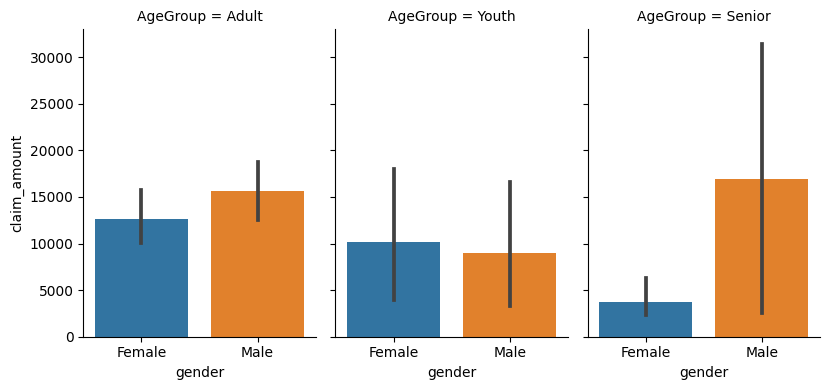

In [52]:
#facetted bar chart representation of fraud claims
sns.catplot(data=fraud_cust_claims, x="gender", y="claim_amount", col="AgeGroup", kind="bar", estimator="mean", aspect = .7, height =4 )

In [53]:
#Average genuine claim amount based on Gender and AgeGroup
avg_genuine_claims = round(genuine_cust_claims.groupby(['gender', 'AgeGroup']).claim_amount.mean(),2)
avg_genuine_claims

gender  AgeGroup
Female  Adult       12159.82
        Senior      14951.18
        Youth       13147.12
Male    Adult       12114.23
        Senior      12603.98
        Youth       13273.44
Name: claim_amount, dtype: float64

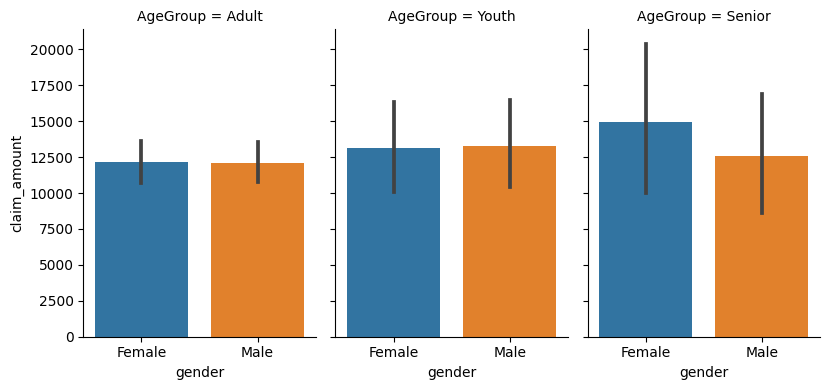

In [54]:
#facetted bar chart representation of genuine claims
sns.catplot(data=genuine_cust_claims, x="gender", y="claim_amount", col="AgeGroup", kind="bar", estimator="mean", aspect = .7, height =4 )

### Is there any similarity in the amount claimed by males and females?

In [55]:
# declare the variable for which we want to do the analysis
var = 'claim_amount'

# filter the data based on segments
s1 = cust_claims.loc[ cust_claims.gender == 'Male', var ]
s2 = cust_claims.loc[ cust_claims.gender == 'Female', var ]

# display the mean of the two sample
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean() )

mean of s1:  12821.132807700185 | mean of s2:  12101.3689662923


Text(0.5, 1.0, 'Average Amount Claimed by Gender')

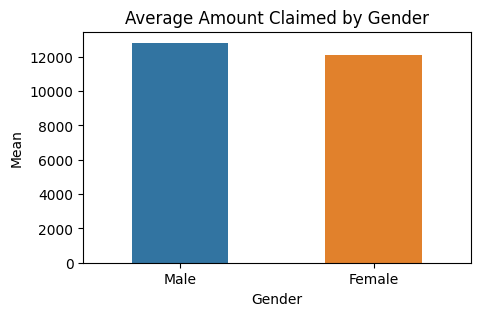

In [56]:
#generate a bar chart for the means
bar1 = pd.DataFrame({'Gender': {0: 'Male', 1: 'Female'}, 
                   'Mean': {0: s1.mean(), 1: s2.mean()}}) 

fig = plt.figure(figsize = (5, 3))
sns.barplot(x="Gender", y = 'Mean', data = bar1, width= 0.5 )
plt.title("Average Amount Claimed by Gender")

##### From the above bar plot we can say that amount claimed by Male and Female are quite similar but male has higher share in the claim amount. We will confirm this using the Hypothesis testing.
##### Since these are the independent samples and continous in nature we will perform the independent sample t-test. 

### Independent Sample T-Test

#### Step 1: Hypothesis

                    Null hypothesis: All the samples are from SAME population, means are EQUAL
                    Alternative hypothesis: Samples are from DIFFERENT population, means are UNEQUAL

#### Step 2: Criteria for Decision

                    alpha = 0.05
                    Accept null hypothesis if p-value is greater than alpha
                    Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating Test Statistic and P-value

In [57]:
# perform the test
alpha = 0.05
statistic, pvalue = stats.ttest_ind( s1, s2 )

#### Step 4: Making Decision

In [58]:
print(f'Alpha: {alpha} \nT-statistic: {statistic} \nP-value: {pvalue}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. Hence the samples are from the SAME population')
else: 
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  Hence the samples are NOT from the SAME population')

Alpha: 0.05 
T-statistic: 0.8845824701924503 
P-value: 0.3765792987503981
Decision: Accept Null Hypothesis as p-value is greater than alpha. Hence the samples are from the SAME population


#### Step 5: Business Implications
With 95% confidence we can say that the amount claimed by males and females are similar. 

### Is there any relationship between age category and segment?

In [59]:
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab( cust_claims.AgeGroup, cust_claims.Segment )            #other ways to get this table: pivot_table, groupby
obs_freq

Segment,Gold,Platinum,Silver
AgeGroup,,,
Adult,278,268,257
Senior,28,26,21
Youth,56,59,59


##### Since we have to find out the relationship between two categorical variables (i.e. Segment and AgeGroup) we will go with Chi Square Test

### Chi-Square Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the Segment and Age Group.
                    Alternative hypothesis: There is an association between the Segment and Age Group.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [60]:
alpha = 0.01
chi2, pvalue, dof, expected = stats.chi2_contingency( obs_freq )

#### Step 4: Making Decision

In [61]:
print(f'Alpha: {alpha} \nChi-Score: {chi2} \nP-value: {pvalue} \ndof: {dof} \nExpected: {expected}')
if pvalue > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Segment and Age Group.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Segment and Age Group.')

Alpha: 0.01 
Chi-Score: 1.0609696143533567 
P-value: 0.9004143303591767 
dof: 4 
Expected: [[276.31749049 269.44771863 257.23479087]
 [ 25.80798479  25.16634981  24.0256654 ]
 [ 59.87452471  58.38593156  55.73954373]]
Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Segment and Age Group.


#### Step 5: Business Implications
With 99% confidence we can say that the there is NO relationship between segment and age category. People from different age groups can be either from the Gold, Platinum or Silver Segment

### The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was  USD10,000.

In [62]:
#dataset of claim amount for the current year
claims_fy_2017_18 = cust_claims.loc[(cust_claims.claim_date >='2017-04-01') & (cust_claims.claim_date <='2018-03-31')]

In [63]:
#Calculating the average claim amounts for current year (i.e. Financial Year 2017-18)
avg_claim_fy_2017_18 = claims_fy_2017_18.claim_amount.mean()
avg_claim_fy_2017_18

12961.9005070713

In [64]:
#population mean (i.e. Fiscal year 2016-17)
popmean = 10000

Text(0.5, 1.0, 'Average Amount Claimed by Fiscal Year')

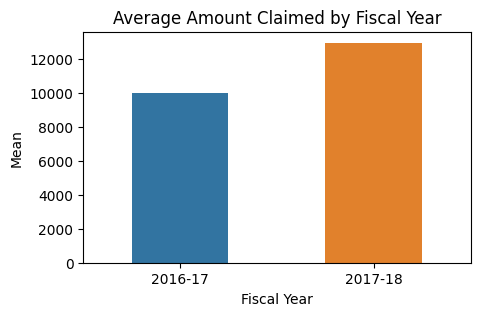

In [65]:
#generate a bar chart for the mean comparison b/w the two fiscal years
bar1 = pd.DataFrame({'Fiscal Year': {0: '2016-17', 1: '2017-18'}, 
                   'Mean': {0: popmean, 1: avg_claim_fy_2017_18}}) 

fig = plt.figure(figsize = (5, 3))
sns.barplot(x="Fiscal Year", y = 'Mean', data = bar1, width= 0.5 )
plt.title("Average Amount Claimed by Fiscal Year")

#### Since we need to compare the average of the Population (2016-17 Fiscal Year) with the Current year Fiscal Year (i.e. 2017-18) we will conduct the 1 Sample T-Test
        
*One Sample T-Test*

#### Step 1: Hypothesis
                                Null hypothesis: Sample mean is less than Population mean (u<=10000)
                                Alternative hypothesis: Samples mean is greater than Population mean (u>10000)
#### Step 2: Criteria for Decision
                                    alpha = 0.05
                                    Accept null hypothesis if p-value is greater than alpha
                                    Reject null hypothesis if p-value is less than alpha
#### Step 3: Calculating Test Statistic and P-value

In [66]:
#Conducting the test
alpha = 0.05
s, p = stats.ttest_1samp(a=claims_fy_2017_18.claim_amount, popmean=popmean, alternative= "greater")

#### Step 4: Making Decision

In [67]:
print(f'Alpha: {alpha} \nT-statistic: {s} \nP-value: {p}')
if p > alpha:
    print('Decision: We Fail to reject the Null Hypothesis as p-value is greater than alpha. Hence the sample mean is less than Population mean')
else: 
    print('Decision: We Reject the Null Hypothesis as p-value is less than alpha.  Hence the sample mean is gretaer than the Population mean')

Alpha: 0.05 
T-statistic: 5.228508526915012 
P-value: 1.193138110668043e-07
Decision: We Reject the Null Hypothesis as p-value is less than alpha.  Hence the sample mean is gretaer than the Population mean


#### Step 5: Business Implications
With 95% confidence we can say that claim amount in the fiscal year 2017-18 has increased significantly from the year fiscal year 2016-17. 

### Is there any difference between age groups and insurance claims?

In [68]:
#get the num of age groups
cust_claims.AgeGroup.nunique()

3

In [69]:
# get the freq of age groups
cust_claims.AgeGroup.value_counts()

Adult     803
Youth     174
Senior     75
Name: AgeGroup, dtype: int64

In [70]:
# declare the variable for which we want to do the analysis
var = 'claim_amount'

# filter the data based on segments
s1 = cust_claims.loc[ cust_claims.AgeGroup == 'Adult', var ]
s2 = cust_claims.loc[ cust_claims.AgeGroup == 'Youth', var ]
s3 = cust_claims.loc[ cust_claims.AgeGroup == 'Senior', var ]

# display the mean of the three sample
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean() )

mean of s1:  12613.772040402964 | mean of s2:  12561.627733798472 | mean of s3:  12281.450894941634


Text(0.5, 1.0, 'Average Amount Claimed by Different Age Groups')

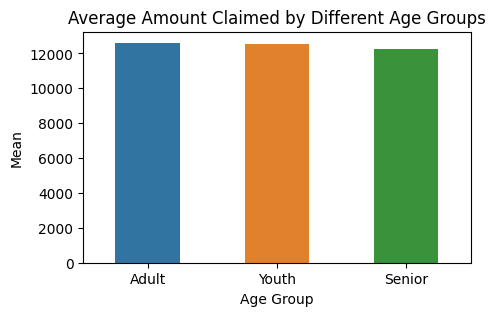

In [71]:
#generate a bar chart for the means
bar1 = pd.DataFrame({'Age Group': {0: 'Adult', 1: 'Youth', 2: 'Senior'}, 
                   'Mean': {0: s1.mean(), 1: s2.mean(), 2: s3.mean()}}) 

fig = plt.figure(figsize = (5, 3))
sns.barplot(x="Age Group", y = 'Mean', data = bar1, width= 0.5 )
plt.title("Average Amount Claimed by Different Age Groups")

#### Since we need to compare the average of the Insurance claim amount (continuous variable) between different Age groups (categorical variable) we will conduct the ANOVA/F-Test
        
*ANOVA or F-Test*

#### Step 1: Hypothesis
                                Null hypothesis: All the samples are from SAME population, means are EQUAL
                                Alternative hypothesis: Samples are from DIFFERENT population, means are UNEQUAL
#### Step 2: Criteria for Decision
                                    alpha = 0.05
                                    Accept null hypothesis if p-value is greater than alpha
                                    Reject null hypothesis if p-value is less than alpha
#### Step 3: Calculating Test Statistics and P-value

In [72]:
# perform the test
s, p = stats.f_oneway( s1, s2, s3 )

#### Step 4: Making Decision

In [73]:
print(f'Alpha: {alpha} \nT-statistic: {s} \nP-value: {p}')
if p > alpha:
    print('Decision: Fail to Reject the Null Hypothesis as p-value is greater than alpha. Hence the samples are from the SAME population')
else: 
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  Hence the samples are NOT from the SAME population')

Alpha: 0.05 
T-statistic: 0.02140333912633794 
P-value: 0.9788245143332135
Decision: Fail to Reject the Null Hypothesis as p-value is greater than alpha. Hence the samples are from the SAME population


#### Step 5: Business Implications
With 95% confidence we can say that there is no difference between age groups and insurance claims

### Is there any relationship between total number of policy claims and the claimed amount?

In [74]:
cust_claims.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'Unreported_Claims', 'Age', 'AgeGroup'],
      dtype='object')

In [75]:
cust_claims.loc[:, ['claim_amount', 'total_policy_claims']].corr()

,claim_amount,total_policy_claims
claim_amount,1.000000,-0.016409
total_policy_claims,-0.016409,1.000000


<AxesSubplot: xlabel='total_policy_claims', ylabel='claim_amount'>

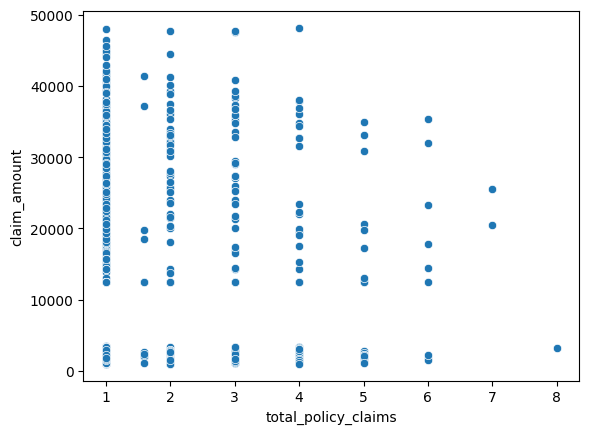

In [76]:
sns.scatterplot(data=cust_claims, x="total_policy_claims", y="claim_amount")

#### From the scatter plot we can see that there is no correlation between the Claim Amount and Total Policy Claims. We will confirm this further with the help of hypothesis testing.

#### Since one variable is categorical in nature and other is continuous and we have to find the relationship between the two we will perform the Spearsman Rank Correlation Test

### Spearsman Rank Correlation Test

#### Step 1: Hypothesis

                    Null hypothesis: There is no relationship between the Total Policy Claims and Claim amount.
                    Alternative hypothesis: There is an association between the Total Policy Claims and Claim amount.

#### Step 2: Criteria for Decision

                alpha = 0.01
                Accept null hypothesis if p-value is greater than alpha
                Reject null hypothesis if p-value is less than alpha

#### Step 3: Calculating the Test Statistics and P-value    

In [77]:
alpha = 0.01
correlation, p = stats.spearmanr( cust_claims.claim_amount ,cust_claims.total_policy_claims )

#### Step 4: Making Decision

In [78]:
print(f'Alpha: {alpha} \nCorrelation: {correlation} \nP-value: {p}')
if p > alpha:
    print('Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Total Policy Claims and Claim amount.')
else:
    print('Decision: Reject Null Hypothesis as p-value is less than alpha.  There is an association between the Total Policy Claims and Claim amount.')

Alpha: 0.01 
Correlation: 0.007767266668791461 
P-value: 0.7974738864190329
Decision: Accept Null Hypothesis as p-value is greater than alpha. There is no relationship between the Total Policy Claims and Claim amount.


#### Step 5: Business Implications
With 99% confidence we can say that the there is NO relationship between Total Policy claims and claim amount.